In [41]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Biblioteca de equipo
# ------------------------------------------------------------------------------

import importlib
import bibliotecatalento as bt
importlib.reload(bt)

<module 'bibliotecatalento' from 'c:\\Users\\lejob\\OneDrive\\Escritorio\\Análisis de Datos\\Adalab\\project-da-promo-50-modulo-3-team-4\\bibliotecatalento.py'>

In [42]:
df = pd.read_csv("hr_raw_data.csv", index_col = 0)

# 1. EDA

In [44]:
df.head()  

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
0,51,No,NaN,2015.722222,NaN,6,3,NaN,1,1,1,0,NaN,3,5,resEArch DIREcToR,3,NaN,"16280,83$","42330,17$",7,Y,No,13,"3,0",3,Full Time,0,NaN,5,"3,0",20,NaN,15,15,"16280,83$",1972,"195370,00$",NaN,NaN,Yes
1,52,No,NaN,2063.388889,NaN,1,4,Life Sciences,1,2,3,0,NaN,2,5,ManAGeR,3,NaN,NaN,"43331,17$",0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,NaN,1971,"199990,00$",NaN,NaN,1
2,42,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,1,3,3,0,NaN,3,5,ManaGER,4,Married,NaN,"41669,33$",1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,NaN,1981,"192320,00$",ManaGER - Research & Development,NaN,1
3,47,No,travel_rarely,1771.404762,NaN,2,4,Medical,1,4,1,1,NaN,3,4,ReseArCH DIrECtOr,3,Married,"14307,50$","37199,50$",3,Y,NaN,19,"3,0",2,Full Time,2,NaN,2,NaN,20,NaN,5,6,"14307,50$",1976,"171690,00$",NaN,NaN,False
4,46,No,NaN,1582.771346,NaN,3,3,Technical Degree,1,5,1,1,NaN,4,4,sAleS EXECUtIve,1,Divorced,"12783,92$","33238,20$",2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,"12783,92$",1977,NaN,NaN,NaN,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1678 entries, 0 to 1677
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1678 non-null   object 
 1   attrition                 1678 non-null   object 
 2   businesstravel            877 non-null    object 
 3   dailyrate                 1678 non-null   float64
 4   department                312 non-null    object 
 5   distancefromhome          1678 non-null   int64  
 6   education                 1678 non-null   int64  
 7   educationfield            904 non-null    object 
 8   employeecount             1678 non-null   int64  
 9   employeenumber            1678 non-null   int64  
 10  environmentsatisfaction   1678 non-null   int64  
 11  gender                    1678 non-null   int64  
 12  hourlyrate                411 non-null    float64
 13  jobinvolvement            1678 non-null   int64  
 14  joblevel     

In [45]:
df.columns  

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction',
       'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'over18', 'overtime', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager', 'sameasmonthlyincome', 'datebirth', 'salary',
       'roledepartament', 'numberchildren', 'remotework'],
      dtype='object')

In [7]:
# age - cambiar a int y unificar redacción
# education - cambiar a object y determinar cuantas categorías hay.
# distancefromhome - revisar millas / km
# employeecount - eliminar
# employeenumber - poner como índice
# gender - cambiar a masculino / femenino
# jobrole - unificar redacción
# monthlyincome - cambiar a float
# monthlyrate - cambiar a float
# over18 - eliminamos
# performancerating - cambiar a int revisando antes valores únicos
# relationshipsatisfaction  - relationshipsatisfaction  
# totalworkingyears - pasar a int
# worklifebalance - pasar a int
# yearsincurrentrole - pasarlo a int 
# sameasmonthlyincome - eliminar 
# datebirth - pasar a formato date
# salary - pasar a float
# roledepartament - eliminar
# numberchildren  - eliminar
# remotework - cambiar a yes / no

In [46]:
bt.valores_unicos(df, nombre='DataFrame')

Buscando valores únicos en DataFrame
age: 54 valores únicos
age: object
Estos valores unicos son
['51' '52' '42' '47' '46' '48' '59' '41' '56' '38' '55' '40' '58' '35'
 '45' '33' '36' '34' 'forty-seven' '53' '43' '60' '32' '37' '49' '39' '50'
 '44' '30' 'fifty-eight' '29' '31' '54' '57' '27' 'thirty-six' '28' '26'
 'fifty-five' '25' 'fifty-two' 'thirty-one' '24' 'thirty' '23' '22' '21'
 '20' 'twenty-six' '19' 'thirty-seven' '18' 'thirty-two' 'twenty-four']
----------------------------
attrition: 2 valores únicos
attrition: object
Estos valores unicos son
['No' 'Yes']
----------------------------
businesstravel: 3 valores únicos
businesstravel: object
Estos valores unicos son
[nan 'travel_rarely' 'travel_frequently' 'non-travel']
----------------------------
dailyrate: 673 valores únicos
dailyrate: float64
Estos valores unicos son
[2015.72222222 2063.38888889 1984.25396825 1771.4047619  1582.77134647
 1771.92063492 1032.48728618  556.256661   1712.18253968 1973.98412698
 2060.70634921 1

In [47]:
df['gender'].value_counts()

gender
0    1009
1     669
Name: count, dtype: int64

In [48]:
df['performancerating'].value_counts()

performancerating
3,0    1257
4,0     221
Name: count, dtype: int64

In [49]:
# Antes de proceder con los cambios de variables, limpiamos los datos
 
df['age'].replace(to_replace = ['forty-seven', 'fifty-eight', 'thirty-six', 'fifty-five', 'fifty-two', 'thirty-one', 'thirty', 'twenty-six', 'thirty-seven', 'thirty-two', 'twenty-four'], value = ['47', '58', '36', '55', '52', '31', '30', '26', '37', '32', '24'], inplace = True)
df['performancerating'].replace(to_replace = ['3,0', '4,0'], value = ['3', '4'], inplace = True)
df['worklifebalance'].replace(to_replace = ['1,0', '2,0', '3,0', '4,0'], value = ['1', '2', '3', '4'], inplace = True)
df['gender'] = df['gender'].astype(str).replace({'0': 'M', '1': 'F'})
df['maritalstatus'].replace(to_replace = ['divorced', 'Marreid'], value = ['Divorced', 'Married'], inplace = True)
df['salary'] = df['salary'].str.replace(',', '.', regex=False)
df['salary'] = df['salary'].replace('[\$]', '', regex=True).astype(float).round()
df['environmentsatisfaction'] = (df['environmentsatisfaction'] / 10).round()
df['yearsincurrentrole'] = df['yearsincurrentrole'].str.replace(',', '.').astype(float)
df['distancefromhome']=df['distancefromhome'].abs()
df['remotework'] = df['remotework'].astype(str).str.strip().isin(['Yes', '1', 'True'])
df['remotework']=df['remotework'].astype('bool')
df['totalworkingyears'] = df['totalworkingyears'].str.replace(',', '.').astype(float).round()

# Aseguramos que todo sea string primero para que .str funcione
df['worklifebalance'] = df['worklifebalance'].astype(str)
# Reemplazamos la coma por punto (decimal correcto)
df['worklifebalance'] = df['worklifebalance'].str.replace(',', '.', regex=False)
# Devolvemos la columna a floats
df['worklifebalance'] = pd.to_numeric(df['worklifebalance'], errors='coerce')
df['worklifebalance'] = df['worklifebalance'].astype('Int64')



<>:9: SyntaxWarning: invalid escape sequence '\$'
<>:9: SyntaxWarning: invalid escape sequence '\$'
C:\Users\lejob\AppData\Local\Temp\ipykernel_15100\3421471095.py:9: SyntaxWarning: invalid escape sequence '\$'
  df['salary'] = df['salary'].replace('[\$]', '', regex=True).astype(float).round()
C:\Users\lejob\AppData\Local\Temp\ipykernel_15100\3421471095.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].replace(to_replace = ['forty-seven', 'fifty-eight', 'thirty-six', 'fifty-five', 'fifty-two', 'thirty-one', 'thirty

In [50]:
print(df['salary'].unique())

[195370. 199990. 192320. 171690.     nan 100072.  53914. 165950. 199730.
 134020. 132060. 195450. 180410. 192460. 107480. 167520.  62010. 198450.
  40010. 104470. 191325. 160640.  32100. 102660. 104750.  61620.  47210.
 153407.  28111.  46150. 169590.  54060.  59020. 108550.  59140.  66460.
 139730.  66870.  47350. 138720. 190450.  96130. 115100. 170460.  36920.
 198470.  23080.  57470. 104220.  63470.  23480.  30720. 124900.  80200.
 170680.  89430. 192720.  55770.  26910.  74030.  88230.  35790. 177790.
 182130. 135770. 191900. 171230. 191870.  79880.  70830.  34070.  29290.
 120310. 154270.  51260.  96190. 190330. 104000.  56740. 191970.  84120.
  33480.  53090.  76540. 128080.  65860.  25190. 170990. 131200.  44440.
  98520. 178610. 137570. 165980.  42850. 101240.  97140.  99240. 112450.
  92410.  64720.  30550.  83210.  31430.  85780.  98880. 133410.  29090.
  95260.  44240.  60740.  61460.  61720.  46680.  56050.  43190.  35640.
  62610.  68040. 194360.  24550.  50550.  52570.  5

In [13]:
df.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
0,51,No,NaN,2015.722222,NaN,6,3,NaN,1,1,0.0,M,NaN,3,5,resEArch DIREcToR,3,NaN,"16280,83$","42330,17$",7,Y,No,13,3,3,Full Time,0,NaN,5,3,20,NaN,15,15,"16280,83$",1972,195370.0,NaN,NaN,True
1,52,No,NaN,2063.388889,NaN,1,4,Life Sciences,1,2,0.0,M,NaN,2,5,ManAGeR,3,NaN,NaN,"43331,17$",0,NaN,NaN,14,3,1,NaN,1,34.0,5,3,33,NaN,11,9,NaN,1971,199990.0,NaN,NaN,True
2,42,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,1,3,0.0,M,NaN,3,5,ManaGER,4,Married,NaN,"41669,33$",1,NaN,No,11,3,4,NaN,0,22.0,3,<NA>,22,NaN,11,15,NaN,1981,192320.0,ManaGER - Research & Development,NaN,True
3,47,No,travel_rarely,1771.404762,NaN,2,4,Medical,1,4,0.0,F,NaN,3,4,ReseArCH DIrECtOr,3,Married,"14307,50$","37199,50$",3,Y,NaN,19,3,2,Full Time,2,NaN,2,<NA>,20,NaN,5,6,"14307,50$",1976,171690.0,NaN,NaN,False
4,46,No,NaN,1582.771346,NaN,3,3,Technical Degree,1,5,0.0,F,NaN,4,4,sAleS EXECUtIve,1,Divorced,"12783,92$","33238,20$",2,Y,No,12,3,4,NaN,1,NaN,5,3,19,NaN,2,8,"12783,92$",1977,NaN,NaN,NaN,False


In [14]:
# Cambio de variables | obj --> int
bt.transformacion_datos(df,['age', 'performancerating', 'worklifebalance'], 'Int64', nombre= 'DataFrame')


Los tipos de datos en DataFrame son
age                          object
attrition                    object
businesstravel               object
dailyrate                   float64
department                   object
distancefromhome              int64
education                     int64
educationfield               object
employeecount                 int64
employeenumber                int64
environmentsatisfaction     float64
gender                       object
hourlyrate                  float64
jobinvolvement                int64
joblevel                      int64
jobrole                      object
jobsatisfaction               int64
maritalstatus                object
monthlyincome                object
monthlyrate                  object
numcompaniesworked            int64
over18                       object
overtime                     object
percentsalaryhike             int64
performancerating            object
relationshipsatisfaction      int64
standardhours               

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
0,51,No,NaN,2015.722222,NaN,6,3,NaN,1,1,0.0,M,NaN,3,5,resEArch DIREcToR,3,NaN,"16280,83$","42330,17$",7,Y,No,13,3,3,Full Time,0,NaN,5,3,20,NaN,15,15,"16280,83$",1972,195370.0,NaN,NaN,True
1,52,No,NaN,2063.388889,NaN,1,4,Life Sciences,1,2,0.0,M,NaN,2,5,ManAGeR,3,NaN,NaN,"43331,17$",0,NaN,NaN,14,3,1,NaN,1,34.0,5,3,33,NaN,11,9,NaN,1971,199990.0,NaN,NaN,True
2,42,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,1,3,0.0,M,NaN,3,5,ManaGER,4,Married,NaN,"41669,33$",1,NaN,No,11,3,4,NaN,0,22.0,3,<NA>,22,NaN,11,15,NaN,1981,192320.0,ManaGER - Research & Development,NaN,True
3,47,No,travel_rarely,1771.404762,NaN,2,4,Medical,1,4,0.0,F,NaN,3,4,ReseArCH DIrECtOr,3,Married,"14307,50$","37199,50$",3,Y,NaN,19,3,2,Full Time,2,NaN,2,<NA>,20,NaN,5,6,"14307,50$",1976,171690.0,NaN,NaN,False
4,46,No,NaN,1582.771346,NaN,3,3,Technical Degree,1,5,0.0,F,NaN,4,4,sAleS EXECUtIve,1,Divorced,"12783,92$","33238,20$",2,Y,No,12,3,4,NaN,1,NaN,5,3,19,NaN,2,8,"12783,92$",1977,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,43,No,NaN,488.944444,NaN,26,3,Medical,1,824,0.0,F,NaN,4,1,rESEaRcH SciEnTiST,3,Single,"3949,17$","10267,83$",4,NaN,NaN,12,3,4,NaN,0,NaN,2,3,3,NaN,1,2,"3949,17$",1980,NaN,NaN,NaN,True
1674,47,No,NaN,1973.984127,NaN,26,4,NaN,1,1087,0.0,F,NaN,3,5,mANager,3,Married,"15943,72$","41453,67$",3,Y,No,11,3,3,Full Time,1,27.0,2,3,5,NaN,1,0,"15943,72$",1976,191325.0,NaN,NaN,False
1675,29,No,travel_rarely,290.035510,NaN,15,3,NaN,1,528,0.0,M,NaN,3,1,reSearch sCienTiSt,4,NaN,NaN,"6090,75$",1,NaN,No,19,3,1,Part Time,0,6.0,1,3,6,NaN,1,5,NaN,1994,28111.0,NaN,NaN,False
1676,47,No,travel_rarely,1032.487286,NaN,4,3,Life Sciences,1,76,0.0,F,NaN,2,3,maNufACTURING DIREctOr,2,Divorced,"8339,32$","21682,23$",8,NaN,Yes,12,<NA>,3,Part Time,1,NaN,4,3,22,NaN,14,10,"8339,32$",1976,100072.0,NaN,NaN,True


In [51]:
# Cambio de variables | obj --> category
bt.transformacion_datos(df,['attrition', 'department', 'education', 'gender', 'maritalstatus', 'overtime', 'standardhours'], 'category', nombre= 'DataFrame')

Los tipos de datos en DataFrame son
age                          object
attrition                    object
businesstravel               object
dailyrate                   float64
department                   object
distancefromhome              int64
education                     int64
educationfield               object
employeecount                 int64
employeenumber                int64
environmentsatisfaction     float64
gender                       object
hourlyrate                  float64
jobinvolvement                int64
joblevel                      int64
jobrole                      object
jobsatisfaction               int64
maritalstatus                object
monthlyincome                object
monthlyrate                  object
numcompaniesworked            int64
over18                       object
overtime                     object
percentsalaryhike             int64
performancerating            object
relationshipsatisfaction      int64
standardhours               

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
0,51,No,NaN,2015.722222,NaN,6,3,NaN,1,1,0.0,M,NaN,3,5,resEArch DIREcToR,3,NaN,"16280,83$","42330,17$",7,Y,No,13,3,3,Full Time,0,NaN,5,3,20,NaN,15,15,"16280,83$",1972,195370.0,NaN,NaN,True
1,52,No,NaN,2063.388889,NaN,1,4,Life Sciences,1,2,0.0,M,NaN,2,5,ManAGeR,3,NaN,NaN,"43331,17$",0,NaN,NaN,14,3,1,NaN,1,34.0,5,3,33,NaN,11,9,NaN,1971,199990.0,NaN,NaN,True
2,42,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,1,3,0.0,M,NaN,3,5,ManaGER,4,Married,NaN,"41669,33$",1,NaN,No,11,3,4,NaN,0,22.0,3,<NA>,22,NaN,11,15,NaN,1981,192320.0,ManaGER - Research & Development,NaN,True
3,47,No,travel_rarely,1771.404762,NaN,2,4,Medical,1,4,0.0,F,NaN,3,4,ReseArCH DIrECtOr,3,Married,"14307,50$","37199,50$",3,Y,NaN,19,3,2,Full Time,2,NaN,2,<NA>,20,NaN,5,6,"14307,50$",1976,171690.0,NaN,NaN,False
4,46,No,NaN,1582.771346,NaN,3,3,Technical Degree,1,5,0.0,F,NaN,4,4,sAleS EXECUtIve,1,Divorced,"12783,92$","33238,20$",2,Y,No,12,3,4,NaN,1,NaN,5,3,19,NaN,2,8,"12783,92$",1977,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,43,No,NaN,488.944444,NaN,26,3,Medical,1,824,0.0,F,NaN,4,1,rESEaRcH SciEnTiST,3,Single,"3949,17$","10267,83$",4,NaN,NaN,12,3,4,NaN,0,NaN,2,3,3,NaN,1,2,"3949,17$",1980,NaN,NaN,NaN,True
1674,47,No,NaN,1973.984127,NaN,26,4,NaN,1,1087,0.0,F,NaN,3,5,mANager,3,Married,"15943,72$","41453,67$",3,Y,No,11,3,3,Full Time,1,27.0,2,3,5,NaN,1,0,"15943,72$",1976,191325.0,NaN,NaN,False
1675,29,No,travel_rarely,290.035510,NaN,15,3,NaN,1,528,0.0,M,NaN,3,1,reSearch sCienTiSt,4,NaN,NaN,"6090,75$",1,NaN,No,19,3,1,Part Time,0,6.0,1,3,6,NaN,1,5,NaN,1994,28111.0,NaN,NaN,False
1676,47,No,travel_rarely,1032.487286,NaN,4,3,Life Sciences,1,76,0.0,F,NaN,2,3,maNufACTURING DIREctOr,2,Divorced,"8339,32$","21682,23$",8,NaN,Yes,12,NaN,3,Part Time,1,NaN,4,3,22,NaN,14,10,"8339,32$",1976,100072.0,NaN,NaN,True


In [52]:
print(df['totalworkingyears'].unique())

[nan 34. 22. 28. 20. 21. 33. 40. 18. 25. 15. 17. 26. 16. 24. 14. 23. 27.
 19. 11. 38. 37. 13. 12. 29. 10. 36. 35.  9. 31. 32.  8.  7. 30.  6.  5.
  4.  3.  2.  1.  0.]


In [53]:
print(df['yearsincurrentrole'].unique())

[nan 13. 12. 11.  7.  6.  4.  3.  2.  1.  0.]


In [54]:
print(df['environmentsatisfaction'].unique())

[0. 4. 2. 3. 1. 5.]


In [55]:
print(df['gender'].unique())

['M', 'F']
Categories (2, object): ['F', 'M']


In [56]:
# Cambio de variables | float --> int
bt.transformacion_datos(df,['environmentsatisfaction', 'totalworkingyears', 'yearsincurrentrole', 'salary'], 'Int64', nombre= 'DataFrame')

Los tipos de datos en DataFrame son
age                           object
attrition                   category
businesstravel                object
dailyrate                    float64
department                  category
distancefromhome               int64
education                   category
educationfield                object
employeecount                  int64
employeenumber                 int64
environmentsatisfaction      float64
gender                      category
hourlyrate                   float64
jobinvolvement                 int64
joblevel                       int64
jobrole                       object
jobsatisfaction                int64
maritalstatus               category
monthlyincome                 object
monthlyrate                   object
numcompaniesworked             int64
over18                        object
overtime                    category
percentsalaryhike              int64
performancerating             object
relationshipsatisfaction       int64
st

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
0,51,No,NaN,2015.722222,NaN,6,3,NaN,1,1,0,M,NaN,3,5,resEArch DIREcToR,3,NaN,"16280,83$","42330,17$",7,Y,No,13,3,3,Full Time,0,<NA>,5,3,20,<NA>,15,15,"16280,83$",1972,195370,NaN,NaN,True
1,52,No,NaN,2063.388889,NaN,1,4,Life Sciences,1,2,0,M,NaN,2,5,ManAGeR,3,NaN,NaN,"43331,17$",0,NaN,NaN,14,3,1,NaN,1,34,5,3,33,<NA>,11,9,NaN,1971,199990,NaN,NaN,True
2,42,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,1,3,0,M,NaN,3,5,ManaGER,4,Married,NaN,"41669,33$",1,NaN,No,11,3,4,NaN,0,22,3,<NA>,22,<NA>,11,15,NaN,1981,192320,ManaGER - Research & Development,NaN,True
3,47,No,travel_rarely,1771.404762,NaN,2,4,Medical,1,4,0,F,NaN,3,4,ReseArCH DIrECtOr,3,Married,"14307,50$","37199,50$",3,Y,NaN,19,3,2,Full Time,2,<NA>,2,<NA>,20,<NA>,5,6,"14307,50$",1976,171690,NaN,NaN,False
4,46,No,NaN,1582.771346,NaN,3,3,Technical Degree,1,5,0,F,NaN,4,4,sAleS EXECUtIve,1,Divorced,"12783,92$","33238,20$",2,Y,No,12,3,4,NaN,1,<NA>,5,3,19,<NA>,2,8,"12783,92$",1977,<NA>,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,43,No,NaN,488.944444,NaN,26,3,Medical,1,824,0,F,NaN,4,1,rESEaRcH SciEnTiST,3,Single,"3949,17$","10267,83$",4,NaN,NaN,12,3,4,NaN,0,<NA>,2,3,3,<NA>,1,2,"3949,17$",1980,<NA>,NaN,NaN,True
1674,47,No,NaN,1973.984127,NaN,26,4,NaN,1,1087,0,F,NaN,3,5,mANager,3,Married,"15943,72$","41453,67$",3,Y,No,11,3,3,Full Time,1,27,2,3,5,<NA>,1,0,"15943,72$",1976,191325,NaN,NaN,False
1675,29,No,travel_rarely,290.035510,NaN,15,3,NaN,1,528,0,M,NaN,3,1,reSearch sCienTiSt,4,NaN,NaN,"6090,75$",1,NaN,No,19,3,1,Part Time,0,6,1,3,6,<NA>,1,5,NaN,1994,28111,NaN,NaN,False
1676,47,No,travel_rarely,1032.487286,NaN,4,3,Life Sciences,1,76,0,F,NaN,2,3,maNufACTURING DIREctOr,2,Divorced,"8339,32$","21682,23$",8,NaN,Yes,12,NaN,3,Part Time,1,<NA>,4,3,22,<NA>,14,10,"8339,32$",1976,100072,NaN,NaN,True


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1678 entries, 0 to 1677
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       1678 non-null   object  
 1   attrition                 1678 non-null   category
 2   businesstravel            877 non-null    object  
 3   dailyrate                 1678 non-null   float64 
 4   department                312 non-null    category
 5   distancefromhome          1678 non-null   int64   
 6   education                 1678 non-null   category
 7   educationfield            904 non-null    object  
 8   employeecount             1678 non-null   int64   
 9   employeenumber            1678 non-null   int64   
 10  environmentsatisfaction   1678 non-null   Int64   
 11  gender                    1678 non-null   category
 12  hourlyrate                411 non-null    float64 
 13  jobinvolvement            1678 non-null   int64   
 1

In [58]:
df['jobrole']=df['jobrole'].str.lower()

In [59]:
df['jobrole']=df['jobrole'].str.title()

In [60]:
bt.eliminar_columnas(df,['employeecount','over18','sameasmonthlyincome','roledepartament','numberchildren'])

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework
0,51,No,NaN,2015.722222,NaN,6,3,NaN,1,0,M,NaN,3,5,Research Director,3,NaN,"16280,83$","42330,17$",7,No,13,3,3,Full Time,0,<NA>,5,3,20,<NA>,15,15,1972,195370,True
1,52,No,NaN,2063.388889,NaN,1,4,Life Sciences,2,0,M,NaN,2,5,Manager,3,NaN,NaN,"43331,17$",0,NaN,14,3,1,NaN,1,34,5,3,33,<NA>,11,9,1971,199990,True
2,42,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,3,0,M,NaN,3,5,Manager,4,Married,NaN,"41669,33$",1,No,11,3,4,NaN,0,22,3,<NA>,22,<NA>,11,15,1981,192320,True
3,47,No,travel_rarely,1771.404762,NaN,2,4,Medical,4,0,F,NaN,3,4,Research Director,3,Married,"14307,50$","37199,50$",3,NaN,19,3,2,Full Time,2,<NA>,2,<NA>,20,<NA>,5,6,1976,171690,False
4,46,No,NaN,1582.771346,NaN,3,3,Technical Degree,5,0,F,NaN,4,4,Sales Executive,1,Divorced,"12783,92$","33238,20$",2,No,12,3,4,NaN,1,<NA>,5,3,19,<NA>,2,8,1977,<NA>,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,43,No,NaN,488.944444,NaN,26,3,Medical,824,0,F,NaN,4,1,Research Scientist,3,Single,"3949,17$","10267,83$",4,NaN,12,3,4,NaN,0,<NA>,2,3,3,<NA>,1,2,1980,<NA>,True
1674,47,No,NaN,1973.984127,NaN,26,4,NaN,1087,0,F,NaN,3,5,Manager,3,Married,"15943,72$","41453,67$",3,No,11,3,3,Full Time,1,27,2,3,5,<NA>,1,0,1976,191325,False
1675,29,No,travel_rarely,290.035510,NaN,15,3,NaN,528,0,M,NaN,3,1,Research Scientist,4,NaN,NaN,"6090,75$",1,No,19,3,1,Part Time,0,6,1,3,6,<NA>,1,5,1994,28111,False
1676,47,No,travel_rarely,1032.487286,NaN,4,3,Life Sciences,76,0,F,NaN,2,3,Manufacturing Director,2,Divorced,"8339,32$","21682,23$",8,Yes,12,NaN,3,Part Time,1,<NA>,4,3,22,<NA>,14,10,1976,100072,True


In [61]:
df.drop_duplicates(inplace=True)

In [62]:
bt.revisar_nulos(df)

Valores nulos por columna:
businesstravel         772
department            1312
educationfield         745
hourlyrate            1210
maritalstatus          651
monthlyincome          468
overtime               676
performancerating      195
standardhours          338
totalworkingyears      526
worklifebalance        108
yearsincurrentrole    1580
salary                 274
dtype: int64
Porcentaje de nulos por columna:
businesstravel        47.83%
department            81.29%
educationfield        46.16%
hourlyrate            74.97%
maritalstatus         40.33%
monthlyincome          29.0%
overtime              41.88%
performancerating     12.08%
standardhours         20.94%
totalworkingyears     32.59%
worklifebalance        6.69%
yearsincurrentrole    97.89%
salary                16.98%
dtype: object
Número de filas duplicadas:
0


In [63]:
duplicados = df[df.duplicated(keep=False)]  # Muestra todas las filas duplicadas
print(duplicados)

Empty DataFrame
Columns: [age, attrition, businesstravel, dailyrate, department, distancefromhome, education, educationfield, employeenumber, environmentsatisfaction, gender, hourlyrate, jobinvolvement, joblevel, jobrole, jobsatisfaction, maritalstatus, monthlyincome, monthlyrate, numcompaniesworked, overtime, percentsalaryhike, performancerating, relationshipsatisfaction, standardhours, stockoptionlevel, totalworkingyears, trainingtimeslastyear, worklifebalance, yearsatcompany, yearsincurrentrole, yearssincelastpromotion, yearswithcurrmanager, datebirth, salary, remotework]
Index: []


In [64]:
df.set_index('employeenumber', inplace=True)

In [65]:
df.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework
employeenumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,51,No,NaN,2015.722222,NaN,6,3,NaN,0,M,NaN,3,5,Research Director,3,NaN,"16280,83$","42330,17$",7,No,13,3,3,Full Time,0,<NA>,5,3,20,<NA>,15,15,1972,195370,True
2,52,No,NaN,2063.388889,NaN,1,4,Life Sciences,0,M,NaN,2,5,Manager,3,NaN,NaN,"43331,17$",0,NaN,14,3,1,NaN,1,34,5,3,33,<NA>,11,9,1971,199990,True
3,42,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,0,M,NaN,3,5,Manager,4,Married,NaN,"41669,33$",1,No,11,3,4,NaN,0,22,3,<NA>,22,<NA>,11,15,1981,192320,True
4,47,No,travel_rarely,1771.404762,NaN,2,4,Medical,0,F,NaN,3,4,Research Director,3,Married,"14307,50$","37199,50$",3,NaN,19,3,2,Full Time,2,<NA>,2,<NA>,20,<NA>,5,6,1976,171690,False
5,46,No,NaN,1582.771346,NaN,3,3,Technical Degree,0,F,NaN,4,4,Sales Executive,1,Divorced,"12783,92$","33238,20$",2,No,12,3,4,NaN,1,<NA>,5,3,19,<NA>,2,8,1977,<NA>,False


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1614 entries, 1 to 1614
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       1614 non-null   object  
 1   attrition                 1614 non-null   category
 2   businesstravel            842 non-null    object  
 3   dailyrate                 1614 non-null   float64 
 4   department                302 non-null    category
 5   distancefromhome          1614 non-null   int64   
 6   education                 1614 non-null   category
 7   educationfield            869 non-null    object  
 8   environmentsatisfaction   1614 non-null   Int64   
 9   gender                    1614 non-null   category
 10  hourlyrate                404 non-null    float64 
 11  jobinvolvement            1614 non-null   int64   
 12  joblevel                  1614 non-null   int64   
 13  jobrole                   1614 non-null   object  
 1

In [67]:
bt.revisar_nulos(df)

Valores nulos por columna:
businesstravel         772
department            1312
educationfield         745
hourlyrate            1210
maritalstatus          651
monthlyincome          468
overtime               676
performancerating      195
standardhours          338
totalworkingyears      526
worklifebalance        108
yearsincurrentrole    1580
salary                 274
dtype: int64
Porcentaje de nulos por columna:
businesstravel        47.83%
department            81.29%
educationfield        46.16%
hourlyrate            74.97%
maritalstatus         40.33%
monthlyincome          29.0%
overtime              41.88%
performancerating     12.08%
standardhours         20.94%
totalworkingyears     32.59%
worklifebalance        6.69%
yearsincurrentrole    97.89%
salary                16.98%
dtype: object
Número de filas duplicadas:
10


In [68]:
bt.nulos_objeto(df)

Las columnas objeto con nulos
['businesstravel', 'department', 'educationfield', 'maritalstatus', 'monthlyincome', 'overtime', 'performancerating', 'standardhours']
Distribución de 'businesstravel':


businesstravel
travel_rarely        0.363073
travel_frequently    0.102230
non-travel           0.056382
Name: count, dtype: float64

Distribución de 'department':


department
Research & Development     0.121437
Sales                      0.056382
Human Resources            0.009294
Name: count, dtype: float64

Distribución de 'educationfield':


educationfield
Life Sciences       0.216233
Medical             0.171004
Marketing           0.064436
Technical Degree    0.042751
Other               0.036555
Human Resources     0.007435
Name: count, dtype: float64

Distribución de 'maritalstatus':


maritalstatus
Married     0.271995
Single      0.201363
Divorced    0.123296
Name: count, dtype: float64

Distribución de 'monthlyincome':


monthlyincome
4492,84$     0.138786
2342,59$     0.135688
8339,32$     0.060719
12783,92$    0.026022
15943,72$    0.014870
               ...   
5415,83$     0.000620
4994,17$     0.000620
3806,67$     0.000620
13920,00$    0.000620
3705,83$     0.000620
Name: count, Length: 493, dtype: float64

Distribución de 'overtime':


overtime
No     0.422553
Yes    0.158612
Name: count, dtype: float64

Distribución de 'performancerating':


performancerating
3    0.746592
4    0.132590
Name: count, dtype: float64

Distribución de 'standardhours':


standardhours
Part Time    0.550186
Full Time    0.240397
Name: count, dtype: float64

Las columnas numéricas con nulos
['hourlyrate', 'totalworkingyears', 'worklifebalance', 'yearsincurrentrole', 'salary']
La distribución de las categorías para cada una de ellas


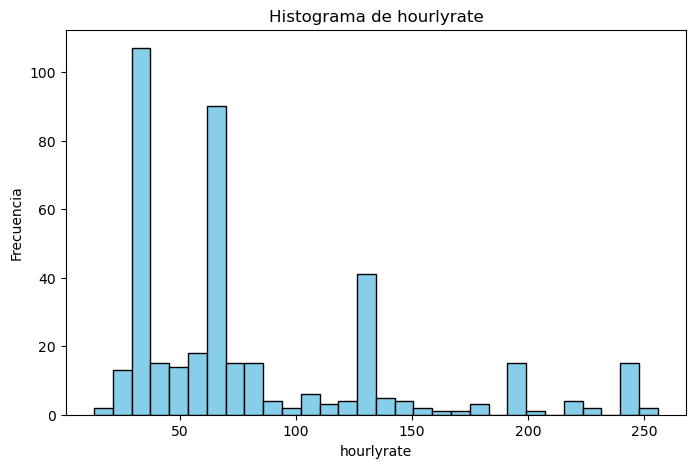

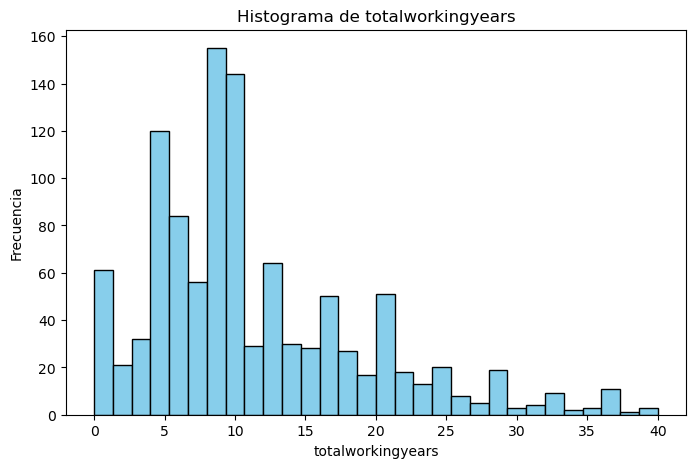

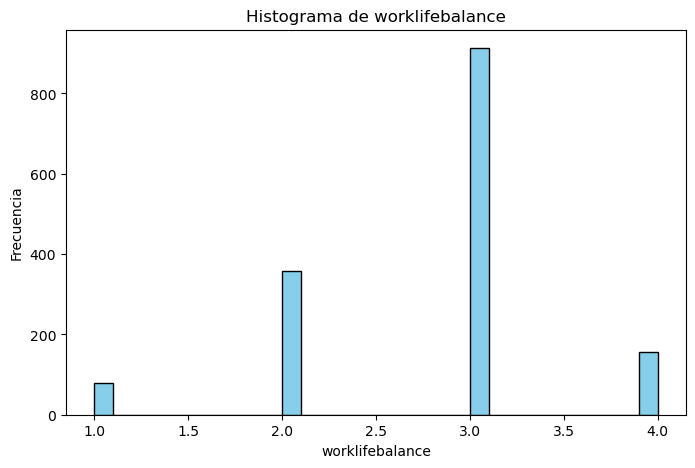

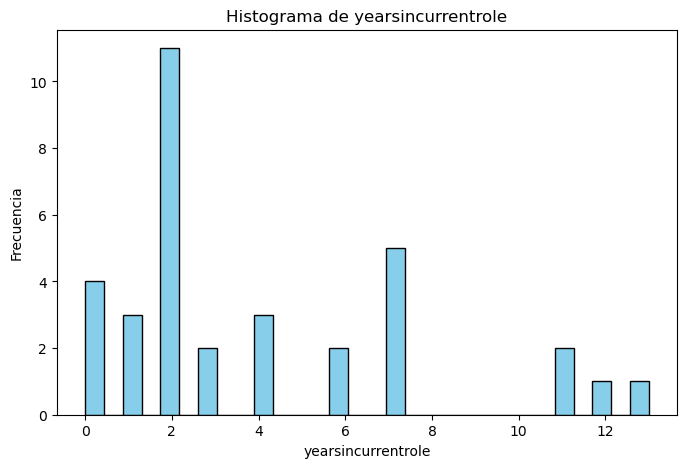

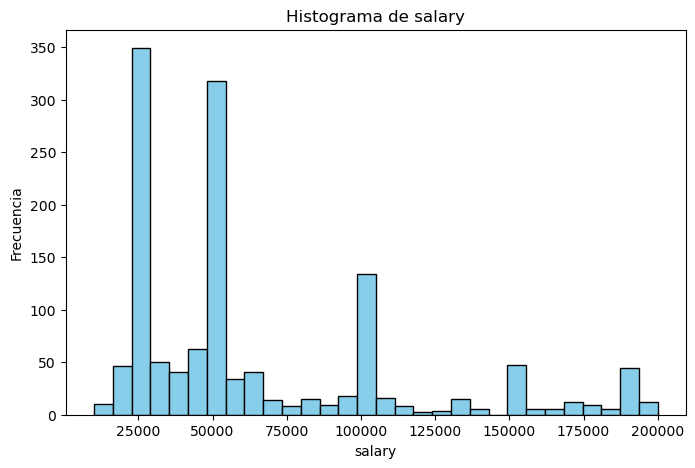

In [69]:
bt.nulos_numericos(df)

In [70]:
bt.nulos_bool(df)

Las columnas objeto con nulos
[]


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1614 entries, 1 to 1614
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       1614 non-null   object  
 1   attrition                 1614 non-null   category
 2   businesstravel            842 non-null    object  
 3   dailyrate                 1614 non-null   float64 
 4   department                302 non-null    category
 5   distancefromhome          1614 non-null   int64   
 6   education                 1614 non-null   category
 7   educationfield            869 non-null    object  
 8   environmentsatisfaction   1614 non-null   Int64   
 9   gender                    1614 non-null   category
 10  hourlyrate                404 non-null    float64 
 11  jobinvolvement            1614 non-null   int64   
 12  joblevel                  1614 non-null   int64   
 13  jobrole                   1614 non-null   object  
 1

In [73]:
bt.imputar_nulos_objetos(df,['businesstravel','maritalstatus','overtime','standardhours'], metodo='moda')

'businesstravel': imputada con la moda → 'travel_rarely'
'maritalstatus': imputada con la moda → 'Married'
'overtime': imputada con la moda → 'No'
'standardhours': imputada con la moda → 'Part Time'


,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework
employeenumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,51,No,travel_rarely,2015.722222,NaN,6,3,NaN,0,M,NaN,3,5,Research Director,3,Married,"16280,83$","42330,17$",7,No,13,3,3,Full Time,0,<NA>,5,3,20,<NA>,15,15,1972,195370,True
2,52,No,travel_rarely,2063.388889,NaN,1,4,Life Sciences,0,M,NaN,2,5,Manager,3,Married,NaN,"43331,17$",0,No,14,3,1,Part Time,1,34,5,3,33,<NA>,11,9,1971,199990,True
3,42,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,0,M,NaN,3,5,Manager,4,Married,NaN,"41669,33$",1,No,11,3,4,Part Time,0,22,3,<NA>,22,<NA>,11,15,1981,192320,True
4,47,No,travel_rarely,1771.404762,NaN,2,4,Medical,0,F,NaN,3,4,Research Director,3,Married,"14307,50$","37199,50$",3,No,19,3,2,Full Time,2,<NA>,2,<NA>,20,<NA>,5,6,1976,171690,False
5,46,No,travel_rarely,1582.771346,NaN,3,3,Technical Degree,0,F,NaN,4,4,Sales Executive,1,Divorced,"12783,92$","33238,20$",2,No,12,3,4,Part Time,1,<NA>,5,3,19,<NA>,2,8,1977,<NA>,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,36,Yes,travel_rarely,1065.277778,NaN,3,1,Life Sciences,0,M,133.159722,2,3,Sales Executive,4,Married,"8604,17$","22370,83$",1,No,11,NaN,1,Full Time,1,<NA>,6,3,16,<NA>,3,7,1987,103250,False
1611,45,No,non-travel,458.817460,NaN,4,2,NaN,0,M,NaN,3,2,Laboratory Technician,2,Married,"3705,83$","9635,17$",1,No,12,3,2,Part Time,0,<NA>,5,2,9,<NA>,0,8,1978,44470,True
1612,39,No,travel_rarely,1032.487286,NaN,13,5,NaN,1,M,NaN,4,3,Sales Executive,3,Single,NaN,"21682,23$",0,No,18,3,4,Part Time,0,9,3,3,8,<NA>,0,7,1984,100072,True


In [74]:
bt.imputar_nulos_numericos(df, ['hourlyrate', 'performancerating', 'totalworkingyears', 'worklifebalance', 'yearsincurrentrole', 'salary'],metodo='mediana')

'hourlyrate': imputada con la mediana → 69.5
'performancerating' no es numérica. Se omite.
'totalworkingyears': imputada con la mediana → 10.0
'worklifebalance': imputada con la mediana → 3.0
'yearsincurrentrole': imputada con la mediana → 2.0
'salary': imputada con la mediana → 53914.0


,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework
employeenumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,51,No,travel_rarely,2015.722222,NaN,6,3,NaN,0,M,69.500000,3,5,Research Director,3,Married,"16280,83$","42330,17$",7,No,13,3,3,Full Time,0,10,5,3,20,2,15,15,1972,195370,True
2,52,No,travel_rarely,2063.388889,NaN,1,4,Life Sciences,0,M,69.500000,2,5,Manager,3,Married,NaN,"43331,17$",0,No,14,3,1,Part Time,1,34,5,3,33,2,11,9,1971,199990,True
3,42,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,0,M,69.500000,3,5,Manager,4,Married,NaN,"41669,33$",1,No,11,3,4,Part Time,0,22,3,3,22,2,11,15,1981,192320,True
4,47,No,travel_rarely,1771.404762,NaN,2,4,Medical,0,F,69.500000,3,4,Research Director,3,Married,"14307,50$","37199,50$",3,No,19,3,2,Full Time,2,10,2,3,20,2,5,6,1976,171690,False
5,46,No,travel_rarely,1582.771346,NaN,3,3,Technical Degree,0,F,69.500000,4,4,Sales Executive,1,Divorced,"12783,92$","33238,20$",2,No,12,3,4,Part Time,1,10,5,3,19,2,2,8,1977,53914,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,36,Yes,travel_rarely,1065.277778,NaN,3,1,Life Sciences,0,M,133.159722,2,3,Sales Executive,4,Married,"8604,17$","22370,83$",1,No,11,NaN,1,Full Time,1,10,6,3,16,2,3,7,1987,103250,False
1611,45,No,non-travel,458.817460,NaN,4,2,NaN,0,M,69.500000,3,2,Laboratory Technician,2,Married,"3705,83$","9635,17$",1,No,12,3,2,Part Time,0,10,5,2,9,2,0,8,1978,44470,True
1612,39,No,travel_rarely,1032.487286,NaN,13,5,NaN,1,M,69.500000,4,3,Sales Executive,3,Single,NaN,"21682,23$",0,No,18,3,4,Part Time,0,9,3,3,8,2,0,7,1984,100072,True


In [75]:
bt.imputar_nulos_objetos_nueva_categoria(df,['department'], metodo='nueva_categoria', nueva_categoria='Unknown')

'department': imputada con nueva categoría → 'Unknown'


,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework
employeenumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,51,No,travel_rarely,2015.722222,Unknown,6,3,NaN,0,M,69.500000,3,5,Research Director,3,Married,"16280,83$","42330,17$",7,No,13,3,3,Full Time,0,10,5,3,20,2,15,15,1972,195370,True
2,52,No,travel_rarely,2063.388889,Unknown,1,4,Life Sciences,0,M,69.500000,2,5,Manager,3,Married,NaN,"43331,17$",0,No,14,3,1,Part Time,1,34,5,3,33,2,11,9,1971,199990,True
3,42,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,0,M,69.500000,3,5,Manager,4,Married,NaN,"41669,33$",1,No,11,3,4,Part Time,0,22,3,3,22,2,11,15,1981,192320,True
4,47,No,travel_rarely,1771.404762,Unknown,2,4,Medical,0,F,69.500000,3,4,Research Director,3,Married,"14307,50$","37199,50$",3,No,19,3,2,Full Time,2,10,2,3,20,2,5,6,1976,171690,False
5,46,No,travel_rarely,1582.771346,Unknown,3,3,Technical Degree,0,F,69.500000,4,4,Sales Executive,1,Divorced,"12783,92$","33238,20$",2,No,12,3,4,Part Time,1,10,5,3,19,2,2,8,1977,53914,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,36,Yes,travel_rarely,1065.277778,Unknown,3,1,Life Sciences,0,M,133.159722,2,3,Sales Executive,4,Married,"8604,17$","22370,83$",1,No,11,NaN,1,Full Time,1,10,6,3,16,2,3,7,1987,103250,False
1611,45,No,non-travel,458.817460,Unknown,4,2,NaN,0,M,69.500000,3,2,Laboratory Technician,2,Married,"3705,83$","9635,17$",1,No,12,3,2,Part Time,0,10,5,2,9,2,0,8,1978,44470,True
1612,39,No,travel_rarely,1032.487286,Unknown,13,5,NaN,1,M,69.500000,4,3,Sales Executive,3,Single,NaN,"21682,23$",0,No,18,3,4,Part Time,0,9,3,3,8,2,0,7,1984,100072,True


In [76]:
bt.imputar_nulos_objetos_nueva_categoria(df,['educationfield'], metodo='nueva_categoria', nueva_categoria='Other')

'educationfield': imputada con nueva categoría → 'Other'


,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework
employeenumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,51,No,travel_rarely,2015.722222,Unknown,6,3,Other,0,M,69.500000,3,5,Research Director,3,Married,"16280,83$","42330,17$",7,No,13,3,3,Full Time,0,10,5,3,20,2,15,15,1972,195370,True
2,52,No,travel_rarely,2063.388889,Unknown,1,4,Life Sciences,0,M,69.500000,2,5,Manager,3,Married,NaN,"43331,17$",0,No,14,3,1,Part Time,1,34,5,3,33,2,11,9,1971,199990,True
3,42,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,0,M,69.500000,3,5,Manager,4,Married,NaN,"41669,33$",1,No,11,3,4,Part Time,0,22,3,3,22,2,11,15,1981,192320,True
4,47,No,travel_rarely,1771.404762,Unknown,2,4,Medical,0,F,69.500000,3,4,Research Director,3,Married,"14307,50$","37199,50$",3,No,19,3,2,Full Time,2,10,2,3,20,2,5,6,1976,171690,False
5,46,No,travel_rarely,1582.771346,Unknown,3,3,Technical Degree,0,F,69.500000,4,4,Sales Executive,1,Divorced,"12783,92$","33238,20$",2,No,12,3,4,Part Time,1,10,5,3,19,2,2,8,1977,53914,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,36,Yes,travel_rarely,1065.277778,Unknown,3,1,Life Sciences,0,M,133.159722,2,3,Sales Executive,4,Married,"8604,17$","22370,83$",1,No,11,NaN,1,Full Time,1,10,6,3,16,2,3,7,1987,103250,False
1611,45,No,non-travel,458.817460,Unknown,4,2,Other,0,M,69.500000,3,2,Laboratory Technician,2,Married,"3705,83$","9635,17$",1,No,12,3,2,Part Time,0,10,5,2,9,2,0,8,1978,44470,True
1612,39,No,travel_rarely,1032.487286,Unknown,13,5,Other,1,M,69.500000,4,3,Sales Executive,3,Single,NaN,"21682,23$",0,No,18,3,4,Part Time,0,9,3,3,8,2,0,7,1984,100072,True


___________ VISUALIZACION_________

In [78]:
print(df.columns)


Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield',
       'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement',
       'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus',
       'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'overtime',
       'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
       'standardhours', 'stockoptionlevel', 'totalworkingyears',
       'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany',
       'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager',
       'datebirth', 'salary', 'remotework'],
      dtype='object')


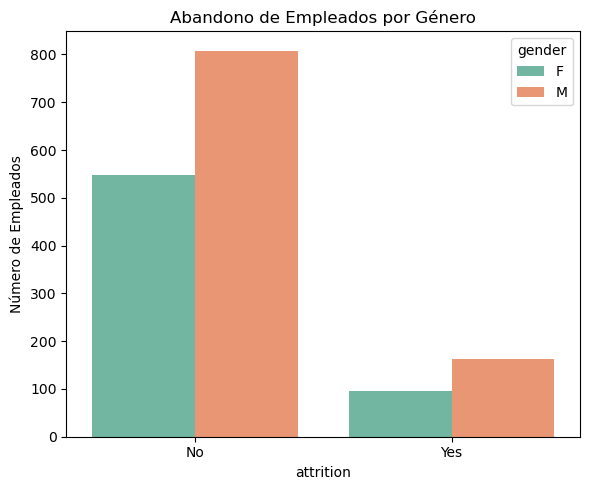

In [ ]:
# Countplot relacion entre variables categóricas entre atrittion y género
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='attrition', hue='gender', palette='Set2')
plt.title('Abandono de Empleados por Género')
plt.ylabel('Número de Empleados')
plt.tight_layout()
plt.show()


C:\Users\lejob\AppData\Local\Temp\ipykernel_15100\3220047104.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='attrition', data=df, palette='Set2')


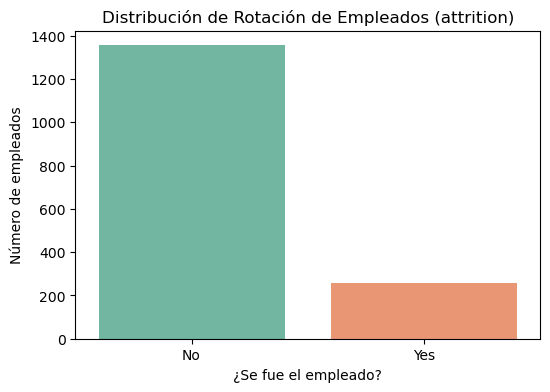

In [ ]:
# Relacion 
plt.figure(figsize=(6,4))
sns.countplot(x='attrition', data=df, palette='Set2')
plt.title('Distribución de Rotación de Empleados (attrition)')
plt.xlabel('¿Se fue el empleado?')
plt.ylabel('Número de empleados')
plt.show()


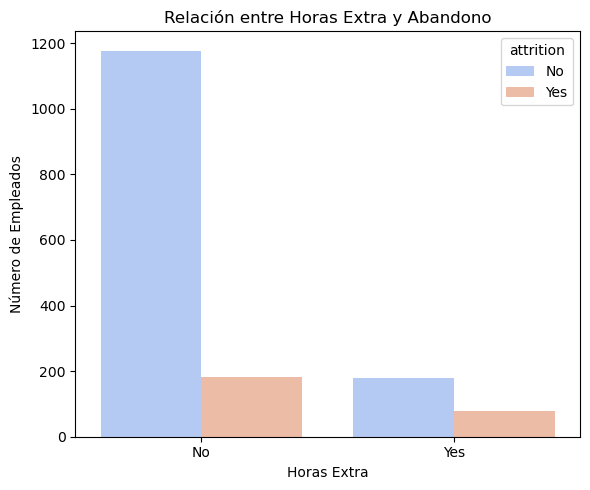

In [92]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='overtime', hue='attrition', palette='coolwarm')
plt.title('Relación entre Horas Extra y Abandono')
plt.xlabel('Horas Extra')
plt.ylabel('Número de Empleados')
plt.tight_layout()
plt.show()
